### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [297]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [343]:
data = pd.read_csv('data/coupons.csv')

In [344]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [345]:
# 1.1 Getting information for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [346]:
# 2.1 Looking for missing values
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [347]:
# 2.2 Relabeling some columns for best manipulation
df = data.rename(columns =  
    { 'passanger': 'passenger',                  
      'has_children': 'hasChildren',
      'Bar': 'bar',
      'CoffeeHouse': 'coffeeHouse',
      'CarryAway': 'carryAway',
      'RestaurantLessThan20': 'restaurantLessThan20',
      'Restaurant20To50': 'restaurant20To50',
      'toCoupon_GEQ5min': 'toCouponGEQ5min',
      'toCoupon_GEQ15min': 'toCouponGEQ15min',
      'toCoupon_GEQ25min': 'toCouponGEQ25min',
      'direction_same': 'directionSame',
      'direction_opp': 'directionOpp',
      'Y': 'couponAccepted'
    })
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passenger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  hasChildren           12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [348]:
### 3.1 Removing car column as this is deprecable as the 99% of values are missing
df = df.drop(['car'], axis=1)

In [349]:
### 3.2 Evaluating possible values for columns
df['destination'].value_counts() # This is OK

destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64

In [350]:
### 3.3 Evaluating possible values for columns
df['passenger'].value_counts() # Replacing characters "(" ")

passenger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64

In [351]:
### 3.3.1 Replacing special characters
df['passenger'] = df['passenger'].str.replace('(', '').str.replace(')', '')
df['passenger'].value_counts()

passenger
Alone      7305
Friends    3298
Partner    1075
Kids       1006
Name: count, dtype: int64

In [352]:
df['weather'].value_counts()

weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64

In [353]:
df['temperature'].value_counts()

temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64

In [354]:
df['time'].value_counts()

time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64

In [355]:
df['coupon'].value_counts()

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

In [356]:
df['coupon'].value_counts()

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

In [357]:
df['expiration'].value_counts()

expiration
1d    7091
2h    5593
Name: count, dtype: int64

In [358]:
# Converting expiration in hours 
df['expiration'] = df['expiration'].str.replace('1d', '24').str.replace('2h', '2')
df = df.rename(columns = { 'expiration': 'expirationHours' })
df['expirationHours'] = pd.to_numeric(df['expirationHours'])
print(df['expirationHours'].value_counts())

expirationHours
24    7091
2     5593
Name: count, dtype: int64


In [359]:
df['gender'].value_counts()

gender
Female    6511
Male      6173
Name: count, dtype: int64

In [360]:
df['age'].value_counts()

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

In [361]:
# Replacing characters to convert age into number
df['age'] = df['age'].str.replace('50plus', '51').str.replace('below21', '16')
df['age'] = pd.to_numeric(df['age'])
print(df['age'].value_counts())

age
21    2653
26    2559
31    2039
51    1788
36    1319
41    1093
46     686
16     547
Name: count, dtype: int64


In [362]:
df['maritalStatus'].value_counts()

maritalStatus
Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: count, dtype: int64

In [363]:
df['hasChildren'].value_counts()

hasChildren
0    7431
1    5253
Name: count, dtype: int64

In [364]:
df['education'].value_counts()

education
Some college - no degree                  4351
Bachelors degree                          4335
Graduate degree (Masters or Doctorate)    1852
Associates degree                         1153
High School Graduate                       905
Some High School                            88
Name: count, dtype: int64

In [365]:
df['occupation'].value_counts()

occupation
Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science           

In [366]:
df['income'].value_counts()

income
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: count, dtype: int64

In [367]:
# Replacing abnormal ranges for income
df['income'] = df['income'].str.replace('Less than ', '$0 - ').str.replace(' or More', '')
df['income'] = df['income'].str.replace('$', '').str.replace(' ', '')
print(df['income'].value_counts())

income
25000-37499    2013
12500-24999    1831
37500-49999    1805
100000         1736
50000-62499    1659
0-12500        1042
87500-99999     895
75000-87499     857
62500-74999     846
Name: count, dtype: int64


In [371]:
# Getting the lower range for salary
def fixIncome(x):
    result = int(x[0])  
    return result

df['lowerIncome'] = df['income'].str.split('-').apply(fixIncome)
print(df['lowerIncome'].value_counts())

lowerIncome
25000     2013
12500     1831
37500     1805
100000    1736
50000     1659
0         1042
87500      895
75000      857
62500      846
Name: count, dtype: int64


In [372]:
df['bar'].value_counts()

bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64

In [373]:
df['coffeeHouse'].value_counts()

coffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64

In [374]:
df['carryAway'].value_counts()

carryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64

In [375]:
df['restaurantLessThan20'].value_counts()

restaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64

In [376]:
df['restaurant20To50'].value_counts()

restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64

In [377]:
df['toCouponGEQ5min'].value_counts()

toCouponGEQ5min
1    12684
Name: count, dtype: int64

In [378]:
df['toCouponGEQ15min'].value_counts()

toCouponGEQ15min
1    7122
0    5562
Name: count, dtype: int64

In [379]:
df['toCouponGEQ25min'].value_counts()

toCouponGEQ25min
0    11173
1     1511
Name: count, dtype: int64

In [380]:
df['directionSame'].value_counts()

directionSame
0    9960
1    2724
Name: count, dtype: int64

In [381]:
df['directionOpp'].value_counts()

directionOpp
1    9960
0    2724
Name: count, dtype: int64

In [382]:
df['couponAccepted'].value_counts()

couponAccepted
1    7210
0    5474
Name: count, dtype: int64

In [383]:
df['couponAccepted'] = df['couponAccepted'].astype(str).str.replace('1', 'Yes').str.replace('0', 'No')
print(df['couponAccepted'].value_counts())

couponAccepted
Yes    7210
No     5474
Name: count, dtype: int64


4. What proportion of the total observations chose to accept the coupon? 



In [405]:
proportionAcceptingCoupon = df.query('couponAccepted == "Yes"').shape[0] / df.shape[0]  * 100

print("The proportion accepting coupon is: ", proportionAcceptingCoupon)
print(df.query('couponAccepted == "Yes"').shape[0])
print(df.shape[0])


The proportion accepting coupon is:  56.84326710816777
7210
12684


**Answer:**

The proportion of accepted coupons in general for the data provided is: `56.84`

5. Use a bar plot to visualize the `coupon` column.

In [133]:
#Grouping records to compare acceptance rate for coupons
barData = df.groupby(['coupon', 'couponAccepted'])['destination'].count().reset_index().sort_values('destination', ascending=False)
print(barData.value_counts())

coupon                 couponAccepted  destination
Bar                    No              1190           1
                       Yes             827            1
Carry out & Take away  No              633            1
                       Yes             1760           1
Coffee House           No              2001           1
                       Yes             1995           1
Restaurant(20-50)      No              834            1
                       Yes             658            1
Restaurant(<20)        No              816            1
                       Yes             1970           1
Name: count, dtype: int64


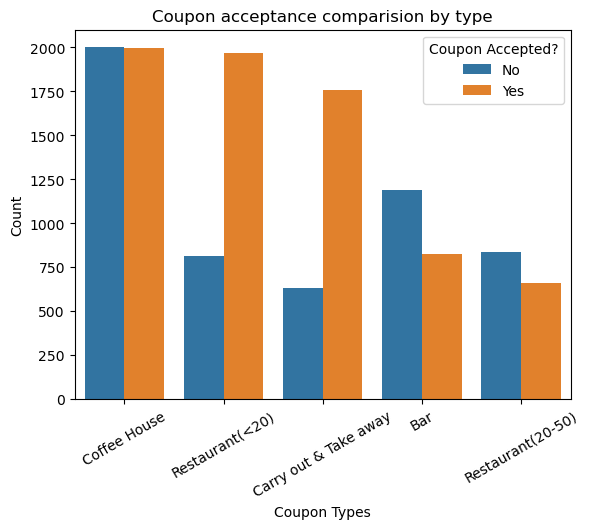

In [406]:
# Ploting a bar comparing if Accepted
sns.barplot(
    barData, 
    x= 'coupon', 
    y='destination',
    hue='couponAccepted'  
)
plt.xticks(rotation = 30)
plt.xlabel('Coupon Types')
plt.ylabel('Count')
plt.title('Coupon acceptance comparision by type')
plt.legend(title='Coupon Accepted?')
plt.savefig('images/5.png', bbox_inches = 'tight')

**Answer:**

Based on the "Coupon Types" graph above, there is a good acceptance for `cheap restaurants` coupons. The major of coupons delivered below this category are accepted (1970 coupons) in comparision with not accepted (816 coupons)

6. Use a histogram to visualize the temperature column.

   temperature couponAccepted  destination
5           80            Yes         3919
4           80             No         2609
3           55            Yes         2061
2           55             No         1779
1           30            Yes         1230
0           30             No         1086


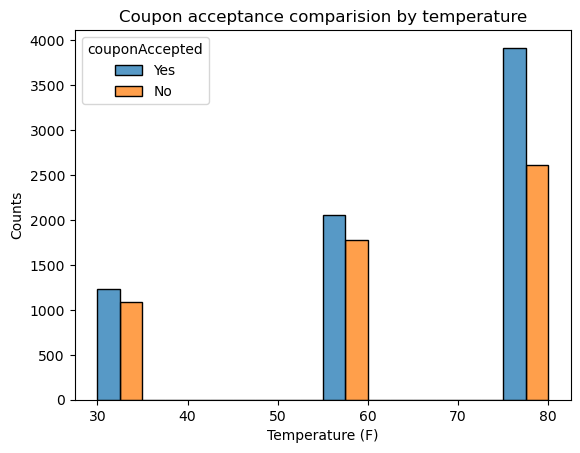

In [407]:
sns.histplot(
    df, 
    x="temperature",
    hue="couponAccepted",
    multiple="dodge",
    bins=10
)
plt.title('Temperature Counts')
plt.xlabel('Temperature (F)')
plt.ylabel('Counts')
plt.title('Coupon acceptance comparision by temperature')
plt.savefig('images/6.png', bbox_inches = 'tight')

print(df.groupby(['temperature', 'couponAccepted'])['destination'].count().reset_index().sort_values('destination', ascending=False))

**Answer:**

Evaluating the temperature and the acceptance of coupons, this is observed the major of coupons are accepted over ambient temperature of `80 degrees`

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [384]:
dfBar = df.query('coupon == "Bar"')
dfBar

,destination,passenger,weather,temperature,time,coupon,expirationHours,gender,age,maritalStatus,...,carryAway,restaurantLessThan20,restaurant20To50,toCouponGEQ5min,toCouponGEQ15min,toCouponGEQ25min,directionSame,directionOpp,couponAccepted,lowerIncome
9,No Urgent Place,Kids,Sunny,80,10AM,Bar,24,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,No,37500
13,Home,Alone,Sunny,55,6PM,Bar,24,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,0,0,1,0,Yes,37500
17,Work,Alone,Sunny,55,7AM,Bar,24,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,1,0,1,No,37500
24,No Urgent Place,Friends,Sunny,80,10AM,Bar,24,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,Yes,62500
35,Home,Alone,Sunny,55,6PM,Bar,24,Male,21,Single,...,4~8,4~8,less1,1,0,0,1,0,Yes,62500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friends,Sunny,80,10PM,Bar,24,Male,26,Single,...,1~3,4~8,1~3,1,1,0,0,1,No,75000
12664,No Urgent Place,Friends,Sunny,55,10PM,Bar,2,Male,26,Single,...,1~3,4~8,1~3,1,1,0,0,1,No,75000
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,24,Male,26,Single,...,1~3,4~8,1~3,1,1,0,0,1,No,75000
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2,Male,26,Single,...,1~3,4~8,1~3,1,1,0,0,1,No,75000


2. What proportion of bar coupons were accepted?


In [385]:
proportionBarCoupons = dfBar.query('couponAccepted == "Yes"').shape[0] / dfBar.shape[0] * 100
proportionBarCoupons

41.00148735746158

**Answer:**

The proportion of *bar* coupons accepted is:  41.00 %

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

In [387]:
less = ['less1', '1~3'] # Went to a bar ( >= 1),  3 or fewer (less1, 1~3)
more = ['4~8', 'gt8']
# dfBar.query('bar in @less').shape[0] / dfBar.query('bar in @more').shape[0]

dfBar3Less = df.query('bar in @less')
dfBar3More = df.query('bar in @more')                        

acceptanceRateLess = dfBar3Less.query('couponAccepted == "Yes"').shape[0] / dfBar3Less.shape[0] * 100
acceptanceRateMore = dfBar3More.query('couponAccepted == "Yes"').shape[0] / dfBar3More.shape[0] * 100

print(acceptanceRateLess)
print(acceptanceRateMore)

58.79093198992443
62.24561403508771


**Answer:**

The acceptance rate for bar coupons is better when the driver has visited a bar more than 3 times having a `62.25%` of acceptance rate vs `58.79%`

- Accepted bar coupons, visits >= 1 <= 3: `58.79`
- Accepted bar coupons, visits       > 3: `62.25`

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [388]:
exclude = ['never', 'less1']
drivers1 = df.query('not bar in @exclude and age > 25')
print('Drivers older than 25 going to a bar more than 1: ', drivers1.shape[0])

acceptanceRate1 = drivers1.query('couponAccepted == "Yes"').shape[0] / drivers1.shape[0] * 100
acceptanceRate1

otherDrivers = df.query('not (not bar in @exclude and age > 25)')
print('Other drivers: ', otherDrivers.shape[0])
acceptanceOthers = otherDrivers.query('couponAccepted == "Yes"').shape[0] / otherDrivers.shape[0] * 100

print(acceptanceRate1)
print(acceptanceOthers)


Drivers older than 25 going to a bar more than 1:  2878
Other drivers:  9806
61.74426685198055
55.40485417091576


**Answer:**

There is more acceptance over drivers visiting more than 1 time a bar and older than 25 year old (`61.74%`) vs other drivers (`55.40%`)

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [389]:
# Evaluating possible values for the columns required
print(df['passenger'].value_counts())
print(df['occupation'].value_counts())

passenger
Alone      7305
Friends    3298
Partner    1075
Kids       1006
Name: count, dtype: int64
occupation
Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                

In [390]:
barVisitsToInclude = ['1~3', '4~8', 'gt8'] # go to bars more than once a month 
excludeOccupations = ['Farming Fishing & Forestry'] #occupations other than farming, fishing, or forestry
drivers = df.query('bar in @barVisitsToInclude and passenger != "Kids" and not occupation in @excludeOccupations')
otherDrivers = df.query('not (bar in @barVisitsToInclude and passenger != "Kids" and not occupation in @excludeOccupations)')

acceptanceDrivers = drivers.query('couponAccepted == "Yes"').shape[0] / drivers.shape[0] * 100
print(acceptanceDrivers)

acceptanceOthers = otherDrivers.query('couponAccepted == "Yes"').shape[0] / otherDrivers.shape[0] * 100
print(acceptanceOthers)

62.310606060606055
54.59501557632399


**Answer:**

The acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming is `62.31%` being better than other drivers with an acceptance of `54.59%`

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



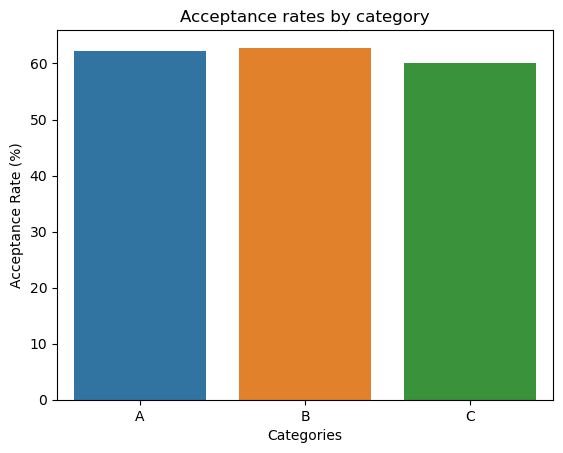

In [408]:
barVisitsToInclude = ['1~3', '4~8', 'gt8'] #go to bars more than once a month
restaurantsToInclude = ['4~8', 'gt8'] #go to cheap restaurants more than 4 times

#had passengers that were not a kid, and were not widowed 
drivers1 = df.query('bar in @barVisitsToInclude and passenger != "Kids" and maritalStatus != "Widowed"')

#go to bars more than once a month and are under the age of 30 
drivers2 = df.query('bar in @barVisitsToInclude and age < 30')

#go to cheap restaurants more than 4 times a month and income is less than 50K
drivers3 = df.query('restaurantLessThan20 in @restaurantsToInclude and lowerIncome < 50000')

#This is created a new DataFrame including as categories (column label) the acceptances for each group of drivers
newDf = pd.DataFrame([{
        "category": 'A', 
        "acceptance": drivers1.query('couponAccepted == "Yes"').shape[0] / drivers1.shape[0] * 100
    }, 
    {
        "category": 'B', 
        "acceptance": drivers2.query('couponAccepted == "Yes"').shape[0] / drivers2.shape[0] * 100
    },
    {
        "category": 'C', 
        "acceptance": drivers3.query('couponAccepted == "Yes"').shape[0] / drivers3.shape[0] * 100
    }
])

#This is used a barplot to generate a visualization for the acceptance over each category
sns.barplot(
    newDf, 
    x= 'category', 
    y='acceptance' 
)
plt.title('Acceptance rates by category')
plt.xlabel('Categories')
plt.ylabel('Acceptance Rate (%)')
plt.savefig('images/bar_6.png', bbox_inches = 'tight')

**Answer:**

The acceptance rate between the different categories is very similar. It is around `60%` of coupons acceptance rate for each one

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Answer:**

Based on the observations summarized below, I can observe the driver coupons acceptances is slightly increased while the driver have visited a bar more frequently (>= 4~8 times per month) with an acceptance rate of `62.24%`. Comparing the above with different filtering criteria, by evaluating passenger kids and age it doesn't improve the acceptance rates. 

Observations: 
- Proportion of bar coupons accepted:  41.00148735746158 
- Accepted bar coupons, visits >= 1 <= 3: 58.79093198992443
- Accepted bar coupons, visits       > 3: 62.24561403508771   (4~8', 'gt8)
- Acceptance rate for drivers older than 25 with more than 1 visit:  61.74 vs 55.40 others
- Acceptance drivers visiting >= 1 a bar with age < 30: ~60

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [391]:
df.head()

,destination,passenger,weather,temperature,time,coupon,expirationHours,gender,age,maritalStatus,...,carryAway,restaurantLessThan20,restaurant20To50,toCouponGEQ5min,toCouponGEQ15min,toCouponGEQ25min,directionSame,directionOpp,couponAccepted,lowerIncome
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),24,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,0,0,0,1,Yes,37500
1,No Urgent Place,Friends,Sunny,80,10AM,Coffee House,2,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,0,0,0,1,No,37500
2,No Urgent Place,Friends,Sunny,80,10AM,Carry out & Take away,2,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,Yes,37500
3,No Urgent Place,Friends,Sunny,80,2PM,Coffee House,2,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,No,37500
4,No Urgent Place,Friends,Sunny,80,2PM,Coffee House,24,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,No,37500


7.1 What proportion of coupons were accepted based on hour of day (time)?

In [392]:
# Adding a columns called "accepted" with number 1 or 0 indicating acceptance. This will be used for sums later
df['accepted'] = df['couponAccepted'].str.replace('Yes', '1').str.replace('No', '0')
df['accepted'] = pd.to_numeric(df['accepted'])

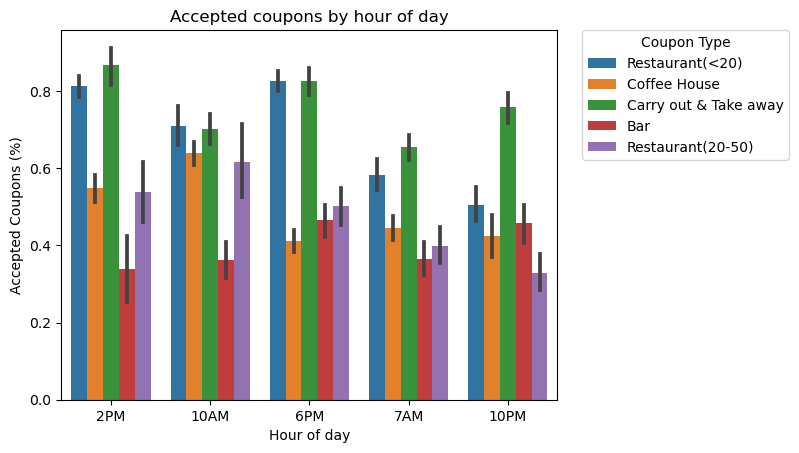

In [296]:
# Plotting bar displaying the percentage of acceptance for coupons based on time of hour
sns.barplot(
    df[['time', 'coupon', 'accepted']], 
    x='time',
    y= 'accepted', 
    hue='coupon'
)
plt.xlabel('Hour of day')
plt.ylabel('Accepted Coupons (%)')
plt.title('Accepted coupons by hour of day')
plt.legend(title='Coupon Type', bbox_to_anchor=(1.05, 1), borderaxespad=0)
plt.savefig('images/7_1.png', bbox_inches = 'tight')


**Answer:**

Based on the observation of above graph, the major acceptance rate happens at `2PM` being `Carry our & Take away` the coupon type with best acceptance rate.

7.2 What is the acceptance rate for coupons type "Carry out & Take away"?

In [393]:
dfCarryOut = df.query('coupon == "Carry out & Take away"')
proportion_acceptance_carryout = dfCarryOut.query('accepted == 1').shape[0] / dfCarryOut.shape[0] * 100
proportion_acceptance_carryout


73.54784788967822

**Answer:**

The acceptance rate for `Carry Out & Take away` coupons is:  `73.55%`

7.3 What is the acceptance rate for coupons delivered at 2PM ?

In [394]:
df2PM = df.query('time == "2PM"')
proportion_acceptance_2pm = df2PM.query('accepted == 1').shape[0] / df2PM.shape[0] * 100
proportion_acceptance_2pm

66.15231458437033

**Answer:**

The acceptance rate for coupons delivered at `2PM` is:  `66.15%`

7.4 What is the acceptance rate for coupons of "Carry out & Take away" were delivered at 2PM based on Marital Status?

       maritalStatus  gender  accepted  count      rate
0           Divorced  Female         5      7  0.714286
1           Divorced    Male         3      3  1.000000
2    Married partner  Female        40     43  0.930233
3    Married partner    Male        25     34  0.735294
4             Single  Female        41     45  0.911111
5             Single    Male        49     55  0.890909
6  Unmarried partner  Female        13     15  0.866667
7  Unmarried partner    Male        10     13  0.769231
8            Widowed  Female         2      2  1.000000
9            Widowed    Male         1      1  1.000000


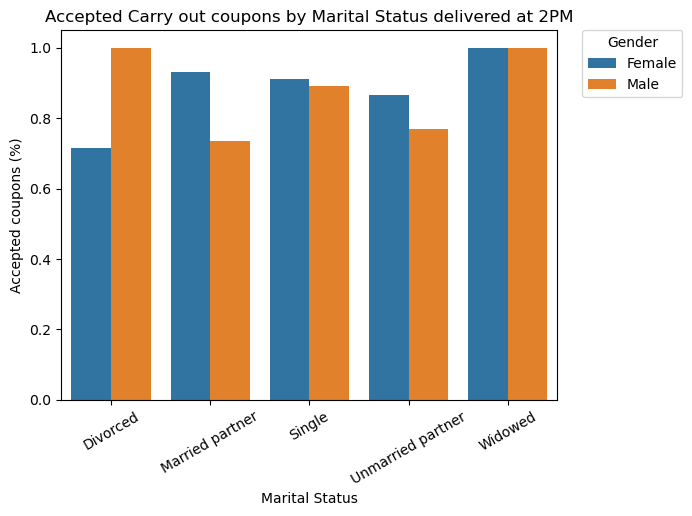

In [396]:
# Filtering the data an getting the accepted coupons added (sum)
df2PMCarryOutAccepted = df.query('coupon == "Carry out & Take away" and time == "2PM"').groupby(
    ['maritalStatus', 'gender'])['accepted'].sum('accepted').reset_index()

# Filtering the data and getting a count for the records on each group
df2PMCarryOutTotal = df.query('coupon == "Carry out & Take away" and time == "2PM"').groupby(
    ['maritalStatus', 'gender'])['accepted'].count().reset_index()
df2PMCarryOutTotal = df2PMCarryOutTotal.rename(columns={ 'accepted': 'count' })

# Joining both tables to calculate the rate (accepted coupons / total coupon for this grouping)
newDf = pd.merge(left=df2PMCarryOutAccepted, right=df2PMCarryOutTotal, on = ['maritalStatus', 'gender'])
newDf['rate'] = newDf['accepted'] / newDf['count']

# Printing the datatable for see details
print(newDf)

# Using bar plot to get a visual comparision for rates 
sns.barplot(
    newDf[['maritalStatus', 'rate', 'gender']], 
    x='maritalStatus',
    y= 'rate',
    hue= 'gender'
)
plt.xticks(rotation = 30)
plt.xlabel('Marital Status')
plt.ylabel('Accepted coupons (%)')
plt.title('Accepted Carry out coupons by Marital Status delivered at 2PM')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.savefig('images/7_4.png', bbox_inches = 'tight')


**Answer:**

Based on the above graph `Widowed` people have the best acceptance rate of 100%, however, this is a very small sample of coupons delivered for this category. From observation of the above dataframe resulting, we could observe the `female married` people have more coupons delivered and with higher acceptance rate: `93%`.

7.5 Evaluate the acceptance rate for Carry out & Take away coupons delivered at 2PM based on income

   lowerIncome  accepted  count      rate
0            0        12     13  0.923077
1        12500        36     40  0.900000
2        25000        34     38  0.894737
3        37500        20     24  0.833333
4        50000        28     31  0.903226
5        62500        11     12  0.916667
6        75000        10     15  0.666667
7        87500        12     13  0.923077
8       100000        26     32  0.812500


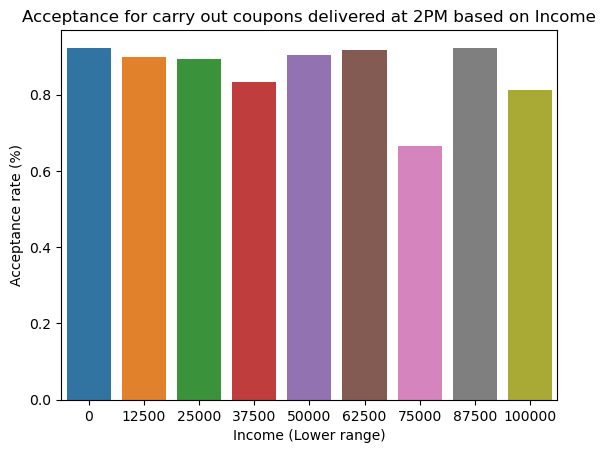

In [293]:
# Filtering the data an getting the accepted coupons only
dfByIncomeAccepted = df.query('coupon == "Carry out & Take away" and time == "2PM"').groupby(
    ['lowerIncome'])['accepted'].sum('accepted').reset_index()

# Filtering the data and getting a count 
dfByIncomeTotal = df.query('coupon == "Carry out & Take away" and time == "2PM"').groupby(
    ['lowerIncome'])['accepted'].count().reset_index()
dfByIncomeTotal = dfByIncomeTotal.rename(columns={ 'accepted': 'count' })

# Joining both tables to calculate the rate (accepted coupons / total coupon for this grouping)
newDf = pd.merge(left=dfByIncomeAccepted, right=dfByIncomeTotal, on = ['lowerIncome'])
newDf['rate'] = newDf['accepted'] / newDf['count']

# Printing the datatable for see details
print(newDf)

# Using bar plot to get a visual comparision for rates 
sns.barplot(
    newDf, 
    x='lowerIncome',
    y= 'rate'
)
plt.xlabel('Income (Lower range)')
plt.ylabel('Acceptance rate (%)')
plt.title('Acceptance for carry out coupons delivered at 2PM based on Income')

plt.savefig('images/7_5.png', bbox_inches = 'tight')

**Answer:**

The acceptance rate based on `Income` for the coupon type `Carry out and take away` delivered at `2PM` is very uniform except for people with income between `$75000-$87499`

7.6 Evaluate the acceptance rate for Carry out & Take away coupons delivered at 2PM based passenger

  passenger  accepted  count      rate
0     Alone        28     37  0.756757
1   Friends       161    181  0.889503


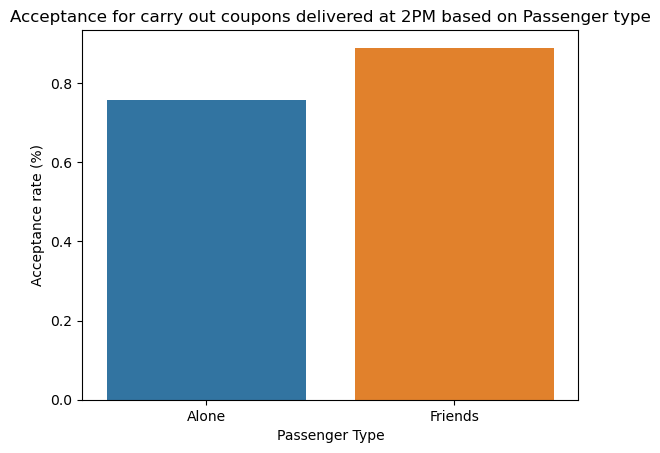

In [403]:
# Filtering the data an getting the accepted coupons only
dfByPassengerSums = df.query('coupon == "Carry out & Take away" and time == "2PM"').groupby(
    ['passenger'])['accepted'].sum('accepted').reset_index()

# Filtering the data and getting a count 
dfByPassengerCounts = df.query('coupon == "Carry out & Take away" and time == "2PM"').groupby(
    ['passenger'])['accepted'].count().reset_index()
dfByPassengerCounts = dfByPassengerCounts.rename(columns={ 'accepted': 'count' })


# Joining both tables to calculate the rate (accepted coupons / total coupon for this grouping)
newDf = pd.merge(left=dfByPassengerSums, right=dfByPassengerCounts, on = ['passenger'])
newDf['rate'] = newDf['accepted'] / newDf['count']

# Printing the datatable for see details
print(newDf)

# Using bar plot to get a visual comparision for rates 
sns.barplot(
    newDf, 
    x='passenger',
    y= 'rate'
)
plt.xlabel('Passenger Type')
plt.ylabel('Acceptance rate (%)')
plt.title('Acceptance for carry out coupons delivered at 2PM based on Passenger type')

plt.savefig('images/7_6.png', bbox_inches = 'tight')

**Answer:**

Based on the above observation, drivers traveling with friends around 2PM have a better acceptance rate for "Carry out and take away" coupons. The acceptance rate for this group is `89%` compare with drivers traveling alone `76%`